In [12]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
data = pd.read_table(r"E:\jupyter-workspace\datas\work\reg.txt")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 9 columns):
date                         335 non-null int64
id                           335 non-null int64
product_id                   335 non-null int64
all_need_password_cnt        335 non-null int64
someone_have_password_cnt    335 non-null int64
active_recog_cnt             335 non-null int64
active_recog_has_pwd_cnt     335 non-null int64
passive_recog_cnt            335 non-null int64
passive_recog_has_pwd_cnt    335 non-null int64
dtypes: int64(9)
memory usage: 23.6 KB


In [114]:
data[data["date"] == 20181023].sort_values(by="all_need_password_cnt", ascending=False)

59.41018186859188

In [5]:
def display_data(date, col):
    dd = data[data["date"] == date]
    cumsum_rate = dd[col].sort_values(ascending=False).cumsum() * 100 / dd[col].sum()
    product_ids = dd.sort_values(by=col, ascending=False).product_id
    
    
    
    display(pd.DataFrame({"product_id": product_ids.values, "cumsum_rate":cumsum_rate.values}))
# display_data(20181023, "all_need_password_cnt")
display_data(20181023, "active_recog_cnt")
# date_23 = data[data["date"] == 20181023]
# display(date_23["all_need_password_cnt"].sort_values(ascending=False))
# display(date_23["all_need_password_cnt"].sum())
# date_23["all_need_password_cnt"].sort_values(ascending=False).cumsum() * 100 / date_23["all_need_password_cnt"].sum(

,product_id,cumsum_rate
0,70,99.641684
1,57,99.806599
2,13,99.893072
3,0,99.972413
4,76,99.992092
5,96,99.996555
6,1,99.999936
7,53,99.999991
8,80,99.999995
9,35,99.999999


In [6]:
product_ids = [70, 57, 1]
data_70 = data[data.product_id == 70]

([<matplotlib.axis.XTick at 0x24d6b380b38>,
 <a list of 23 Text xticklabel objects>)

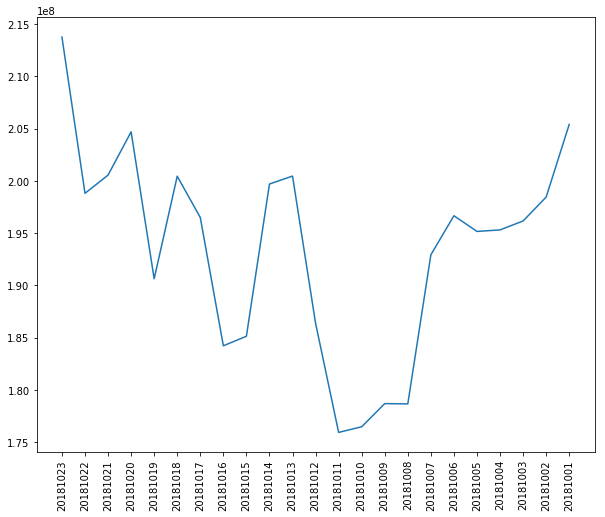

In [7]:
plt.figure(figsize=(10, 8))
plt.plot(range(len(data_70.date)), data_70.all_need_password_cnt)
plt.xticks(range(len(data_70.date)), data_70.date, rotation=90)

In [8]:
data_57 = data[data.product_id == 57]

In [ ]:
data.groupby(by=["date", "product_id"]).sum()

In [13]:
data_sum = data.groupby(by="date").sum()
display(data_sum)

,id,product_id,all_need_password_cnt,someone_have_password_cnt,active_recog_cnt,active_recog_has_pwd_cnt,passive_recog_cnt,passive_recog_has_pwd_cnt
date,,,,,,,,
20181001,17773,722,577872759,349348934,235279713,146529367,342593046,202819567
20181002,17983,722,546162921,330783706,226856712,141308366,319306209,189475340
20181003,18193,722,537013996,325122171,223939619,139308948,313074377,185813223
20181004,18403,722,530660150,320732247,222752835,138278811,307907315,182453436
20181005,18613,722,525983391,317282121,222373554,137643587,303609837,179638534
20181006,18823,722,524603333,315475126,223958959,138176670,300644374,177298456
20181007,19033,722,517074741,309641351,219980508,135028032,297094233,174613319
20181008,19243,722,501431572,299053426,204503405,125031437,296928167,174021989
20181009,19453,722,502843787,299187765,204691034,124988716,298152753,174199049


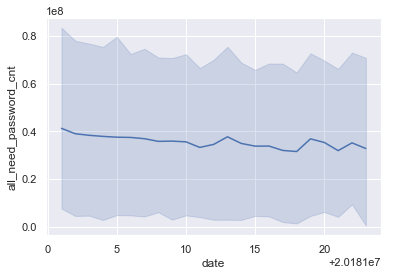

In [18]:
data["date"] = pd.to_datetime(data["date"].astype(str))

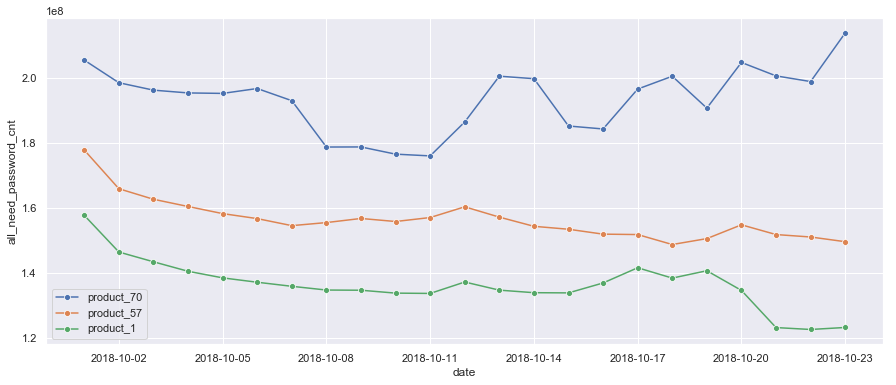

In [44]:
def data_show(col="all_need_password_cnt", product_ids=product_ids):
    plt.figure(figsize=(15, 6))

    for product_id in product_ids:
        pdata = data[data.product_id == product_id]

        sns.lineplot(x="date", y=col, data=pdata, marker='o', label="product_%d" % product_id)
data_show()

In [38]:
data.columns

Index(['date', 'id', 'product_id', 'all_need_password_cnt',
       'someone_have_password_cnt', 'active_recog_cnt',
       'active_recog_has_pwd_cnt', 'passive_recog_cnt',
       'passive_recog_has_pwd_cnt'],
      dtype='object')

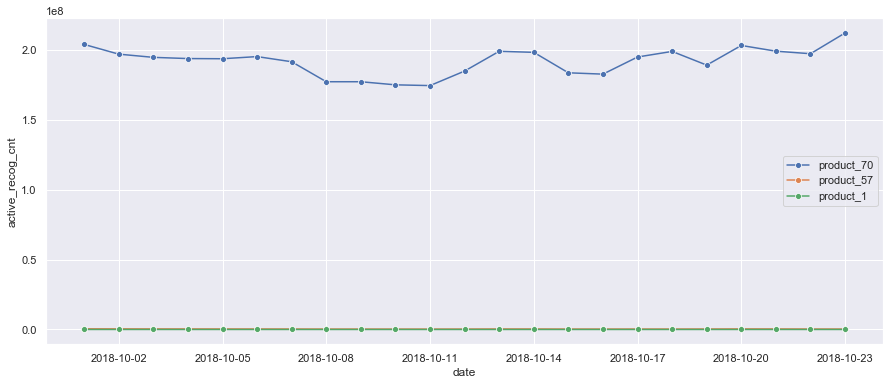

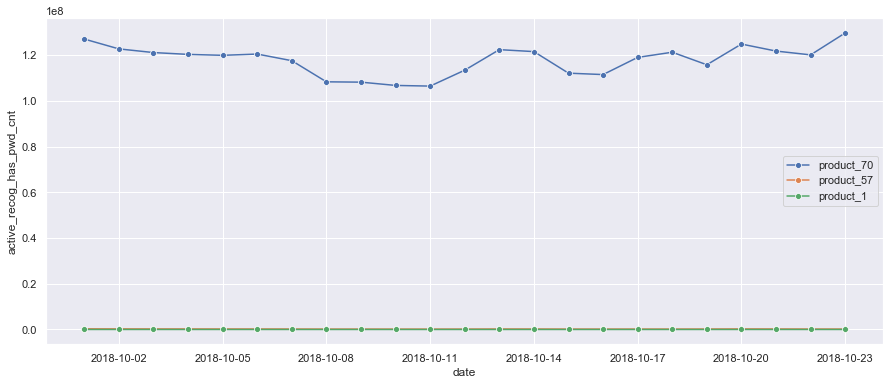

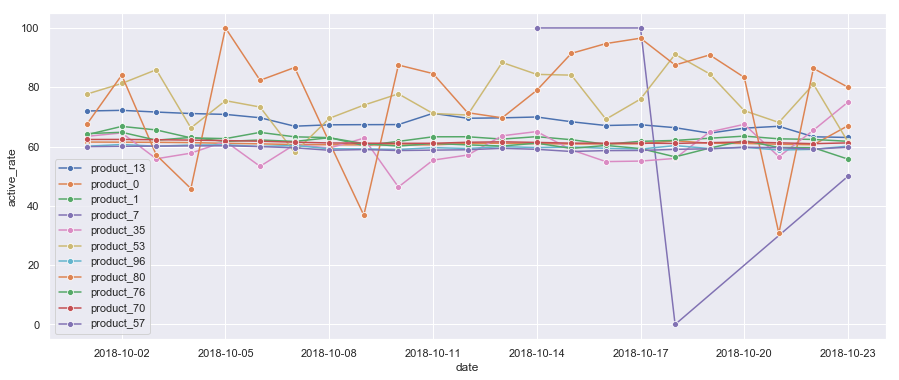

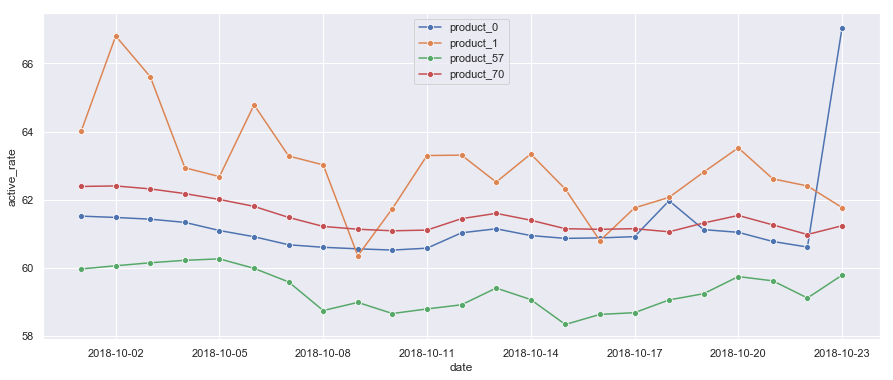

In [71]:
data["active_rate"] = data["active_recog_has_pwd_cnt"] * 100 / data["active_recog_cnt"]
data["all_rate"] = data[""]
data_show("active_recog_cnt")
data_show("active_recog_has_pwd_cnt")
data_show("active_rate", product_ids=pd.unique(data.product_id))
data_show("active_rate", product_ids=[0, 1,57,70])
# display_data("20181023", "active_recog_cnt")

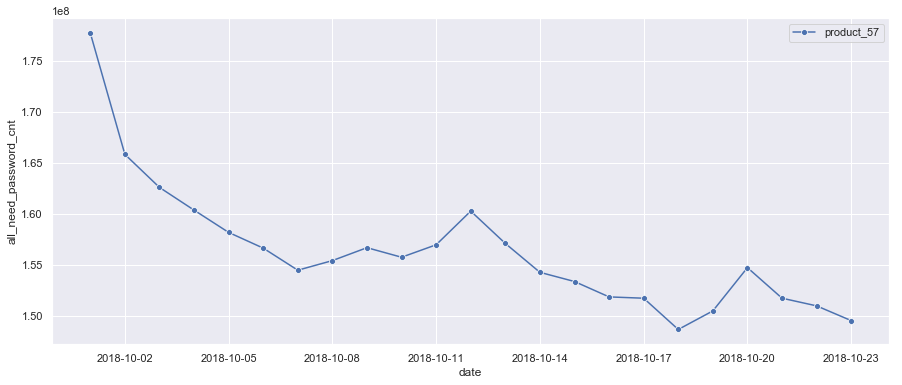

In [48]:
data_show( product_ids=[57])

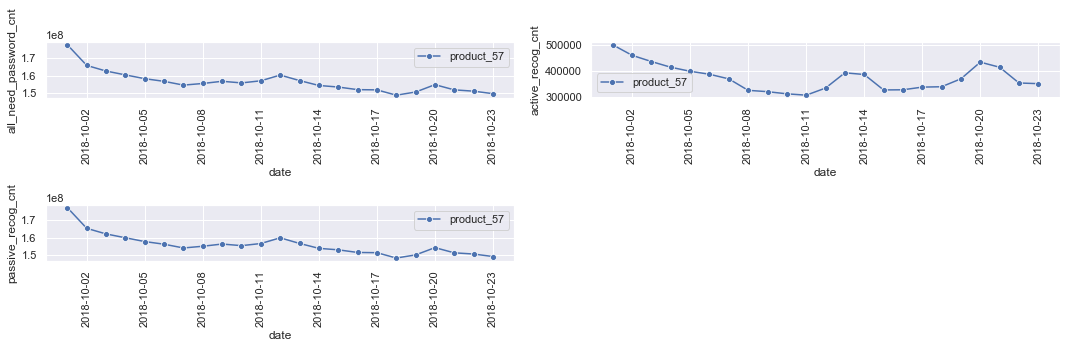

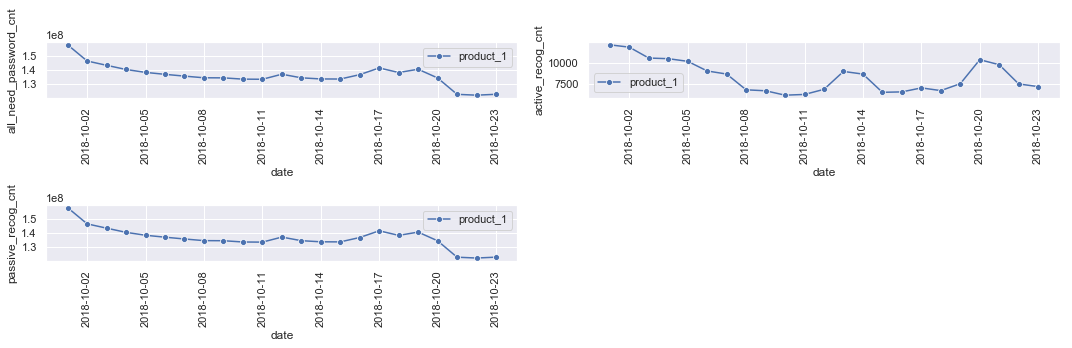

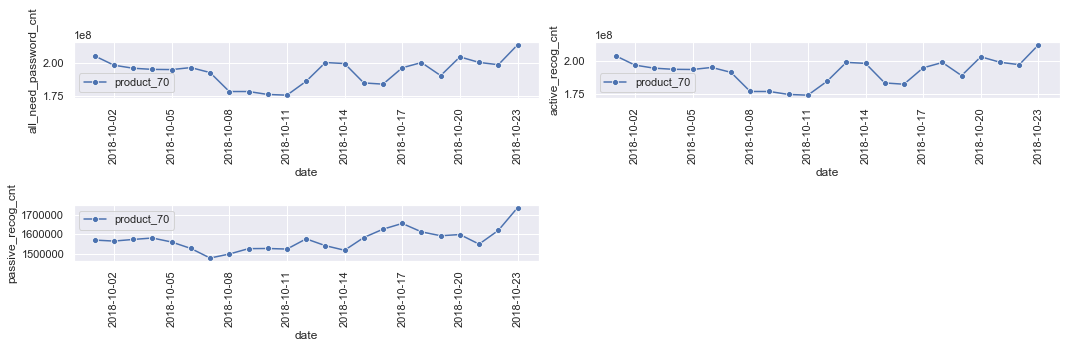

In [66]:
def product_data_show(cols, product_ids=product_ids):
    plt.figure(figsize=(15, 6))
    
    i = 1
    for product_id in product_ids:
        pdata = data[data.product_id == product_id]
        for col in cols:
#             plt.title(col)
            ax = plt.subplot(3, 2, i)
            sns.lineplot(x="date", y=col, data=pdata, marker='o', label="product_%d" % product_id, ax=ax)
            plt.xticks(rotation=90)
            i += 1
            plt.tight_layout()
            
product_data_show(cols=["all_need_password_cnt", "active_recog_cnt", "passive_recog_cnt"], product_ids=[57])
product_data_show(cols=["all_need_password_cnt", "active_recog_cnt", "passive_recog_cnt"], product_ids=[1])
product_data_show(cols=["all_need_password_cnt", "active_recog_cnt", "passive_recog_cnt"], product_ids=[70])

In [86]:

all_active_contribute = None
for date in pd.unique(data.date):
    dd = data[data.date == date]
    
    active_contribute = pd.DataFrame({"product_id":dd.product_id,"date":date, "contribute": dd["active_recog_has_pwd_cnt"] * 100 / dd["active_recog_cnt"].sum()})
    
    if all_active_contribute is None:
        all_active_contribute = active_contribute
    else:
        all_active_contribute = pd.concat([all_active_contribute, active_contribute])
display(all_active_contribute)

,product_id,date,contribute
0,13,2018-10-23,5.454233e-02
1,0,2018-10-23,5.319119e-02
2,1,2018-10-23,2.088509e-03
3,3,2018-10-23,0.000000e+00
4,7,2018-10-23,4.699616e-07
5,97,2018-10-23,0.000000e+00
6,35,2018-10-23,2.819769e-06
7,51,2018-10-23,0.000000e+00
8,53,2018-10-23,3.383723e-05
9,96,2018-10-23,2.684420e-03


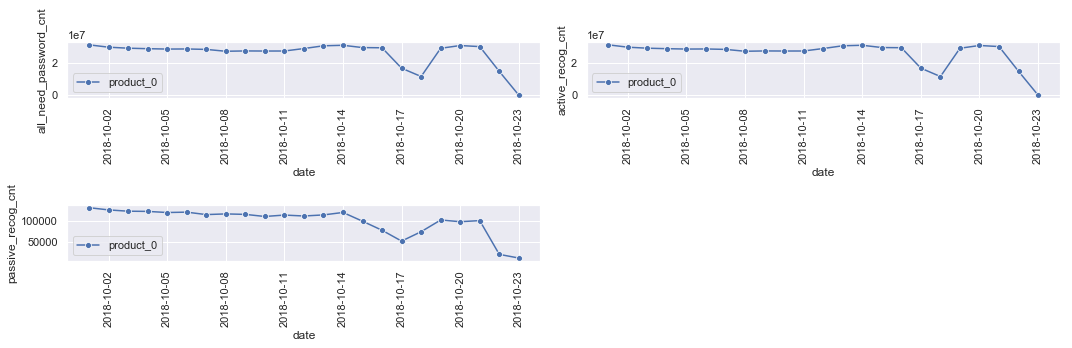

In [70]:
product_data_show(cols=["all_need_password_cnt", "active_recog_cnt", "passive_recog_cnt"], product_ids=[0])

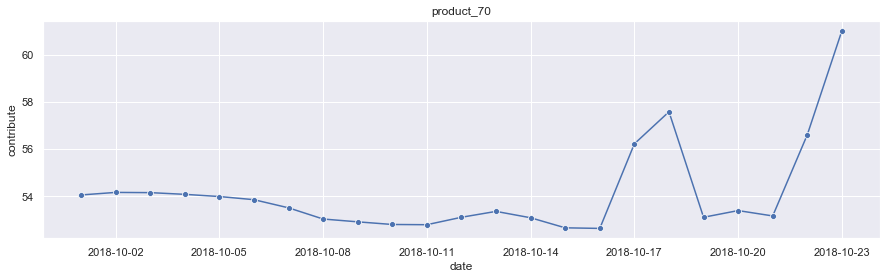

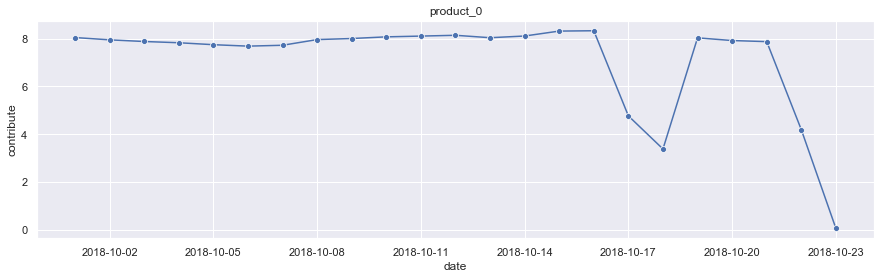

In [107]:
# product_ids = pd.unique(all_active_contribute.product_id)
product_ids = [70, 0]
for product_id in product_ids:
#     product_id = 70
    plt.figure(figsize=(15, 4))
    plt.title("product_%d" % product_id)
    tt = all_active_contribute[all_active_contribute.product_id == product_id].sort_values(by="date", ascending=False)
    sns.lineplot(x="date", y="contribute", data=tt, marker="o")


In [110]:
dd = '20181020'
def tt(dd):
    print(dd)
    print("总主动识别次数：", data[data.date==dd]["active_recog_cnt"].sum())
    print("有密码总主动识别次数：", data[data.date==dd]["active_recog_has_pwd_cnt"].sum())
    print("0产品：")
    
    dd2 = data[data.date==dd]
    
    
    print("总主动识别次数：", dd2[dd2.product_id == 0]["active_recog_cnt"].sum())
    print("有密码总主动识别次数：", dd2[dd2.product_id == 0]["active_recog_has_pwd_cnt"].sum())

tt('20181020')
tt('20181023')

20181020
总主动识别次数： 234097580
有密码总主动识别次数： 143917508
0产品：
总主动识别次数： 30363734
有密码总主动识别次数： 18535979
20181023
总主动识别次数： 212783361
有密码总主动识别次数： 130312754
0产品：
总主动识别次数： 168825
有密码总主动识别次数： 113182


In [102]:
(143917508 - 18535979) /(234097580 - 30363734)

0.6154182599586325

In [103]:
18535979/30363734

0.6104644112611446

In [112]:
(130312754 + 18535979)*100/(212783361 + 30363734)

61.217565852472966

In [113]:
(130312754 )*100/(212783361)

61.24198498772655